In [1]:
#cho google colab

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib

# Lấy data

In [3]:
cols = "mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name\n"
new_file = open('car_data.txt','w')
new_file.write(cols)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
file = urllib. request. urlopen(url)
for line in file:
    decoded_line = line.decode("utf-8")
    decoded_line = decoded_line.split('\t')
    decoded_line[0] = ','.join(decoded_line[0].split())
    decoded_line[1] = decoded_line[1].strip('\n')
    decoded_line = ','.join(decoded_line)
    #print(decoded_line)
    new_file.write(decoded_line + '\n')
new_file.close()

# Kiểm tra dữ liệu

In [4]:
car_data = pd.read_csv('car_data.txt')
car_data.shape

(398, 9)

In [5]:
car_data = car_data.replace('?',np.NaN)
car_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Điền dữ liệu thiếu bằng giá trị mean của cột

In [7]:
#horsepower_df = car_data.loc[:,['horsepower']]
mean = car_data[['horsepower']].loc[~(car_data['horsepower'].isna())]['horsepower'].astype('float64').mean()
car_data['horsepower'].loc[car_data['horsepower'].isna()] = mean
car_data['horsepower'] = car_data['horsepower'].astype('float64')

D:\App\New folder (3)\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
#car_data[['cylinders','model year','origin']] = car_data[['cylinders','model year','origin']].astype('category')

In [9]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Tìm hiểu

**Có 398 samples và 9 attributes**

In [10]:
car_data.shape

(398, 9)

**Có 3 công ty tất cả**

In [11]:
car_data["origin"].unique().tolist()

[1, 3, 2]

**Xe có mpg cao nhất**

In [12]:
car_data[car_data["mpg"] == max(car_data["mpg"])]  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110.0,17.9,80,3,mazda glc


**Chỉ có công ti 1 sản xuất xe có cylinders = 8**

In [13]:
car_data.loc[car_data['cylinders'] == 8].groupby('origin').size()

origin
1    103
dtype: int64

**Tên của xe có 3 cylinders**

In [14]:
car_data.loc[car_data['cylinders'] == 3]['car name'].tolist()

['mazda rx2 coupe', 'maxda rx3', 'mazda rx-4', 'mazda rx-7 gs']

Madza là công ty sản xuất xe hơi của Nhật: Trong thời kì tuổi đời, các sản phẩm nói trên nhận nhiều lời khen của công chúng và hơn nữa còn xuất hiện ở các TOP danh sách. Đa số công chúng ưa chuộng kiểu dáng thể thao bắt mắt.

**Bảng mô tả các trường dữ liệu**

In [15]:
car_data.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [16]:
#car_data['horsepower'].loc[(car_data['horsepower'].isna())] = car_data[['horsepower']].loc[~(car_data['horsepower'].isna())]['horsepower'].astype('float64').mean()

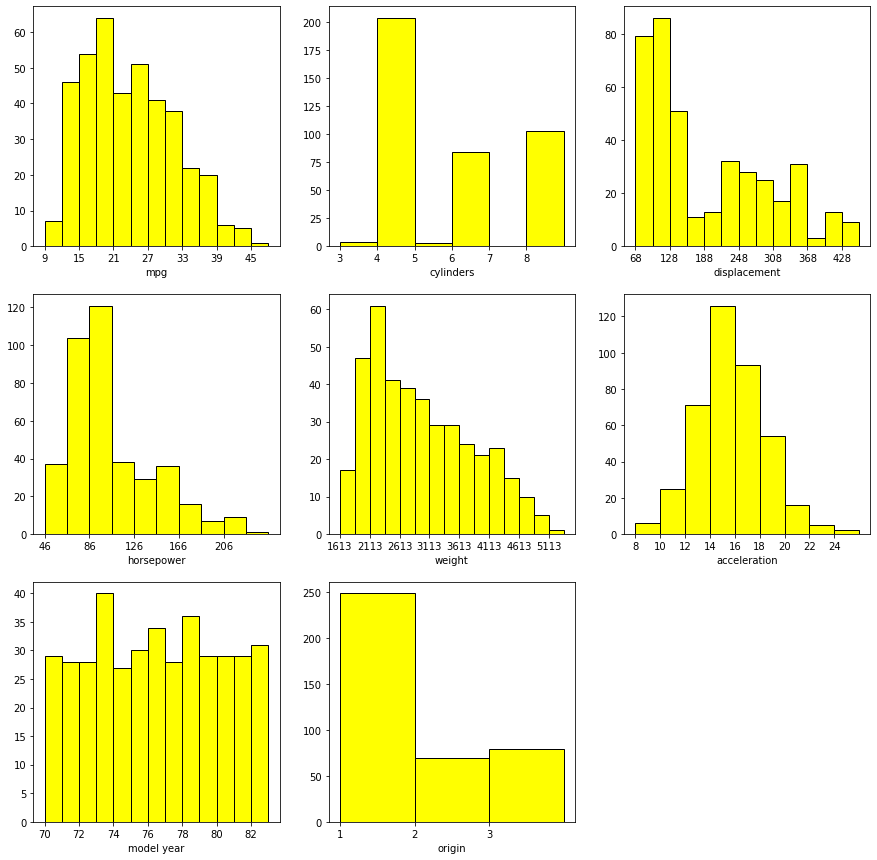

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

bins = np.arange(min(car_data["mpg"]),max(car_data["mpg"]) +3 ,3)
axs[0, 0].hist(car_data["mpg"],bins,edgecolor='black',color = 'yellow')
axs[0, 0].set_xticks(np.arange(min(car_data["mpg"]),max(car_data["mpg"]) ,6))
axs[0, 0].set_xlabel('mpg')

bins = np.arange(3,10,1) 
axs[0, 1].hist(car_data["cylinders"].astype('int64'),bins,edgecolor='black',color = 'yellow')
axs[0, 1].set_xlabel('cylinders')
axs[0, 1].set_xticks(np.arange(3,9,1))

bins = np.arange(min(car_data["displacement"]),max(car_data["displacement"]) + 30 ,30)
axs[0, 2].hist(car_data["displacement"].astype('int64'),bins,edgecolor='black',color = 'yellow')
axs[0, 2].set_xticks(np.arange(min(car_data["displacement"]),max(car_data["displacement"]) ,60))
axs[0, 2].set_xlabel('displacement')

bins = np.arange(min(car_data['horsepower']),max(car_data['horsepower']) +20 ,20)
axs[1, 0].hist(car_data['horsepower'],bins,edgecolor='black',color = 'yellow')
axs[1, 0].set_xticks(np.arange(min(car_data['horsepower']),max(car_data['horsepower']) ,40))
axs[1, 0].set_xlabel('horsepower')


bins = np.arange(min(car_data['weight']),max(car_data['weight']) + 250 ,250)
axs[1, 1].hist(car_data['weight'],bins,edgecolor='black',color = 'yellow')
axs[1, 1].set_xticks(np.arange(min(car_data['weight']),max(car_data['weight']) ,500))
axs[1, 1].set_xlabel('weight')

bins = np.arange(min(car_data['acceleration']),max(car_data['acceleration']) + 2 ,2)
axs[1, 2].hist(car_data['acceleration'],bins,edgecolor='black',color = 'yellow')
axs[1, 2].set_xticks(np.arange(min(car_data['acceleration']),max(car_data['acceleration']) ,2))
axs[1, 2].set_xlabel('acceleration')

bins = np.arange(70,84,1)
axs[2, 0].hist(car_data['model year'],bins = bins,edgecolor='black',color = 'yellow')
axs[2, 0].set_xticks(np.arange(70,84,2))
axs[2, 0].set_xlabel('model year')

bins = np.arange(1,5,1)
axs[2, 1].hist(car_data['origin'].astype('int64'),bins = bins,edgecolor='black',color = 'yellow')
axs[2, 1].set_xlabel('origin')
axs[2, 1].set_xticks(np.arange(1,4,1))

axs[2, 2].axis('off')
plt.show()

Trong dữ liệu này:
* Để ý thấy các các biểu đồ lệch trái, có thể đa số các xe là xe dân dụng (chủ yếu động cơ 4 kì, gia tốc trung bình, mã lực vừa, dung tích xi lanh không cao)
* Công ti 1 sản xuất nhiều xe nhất


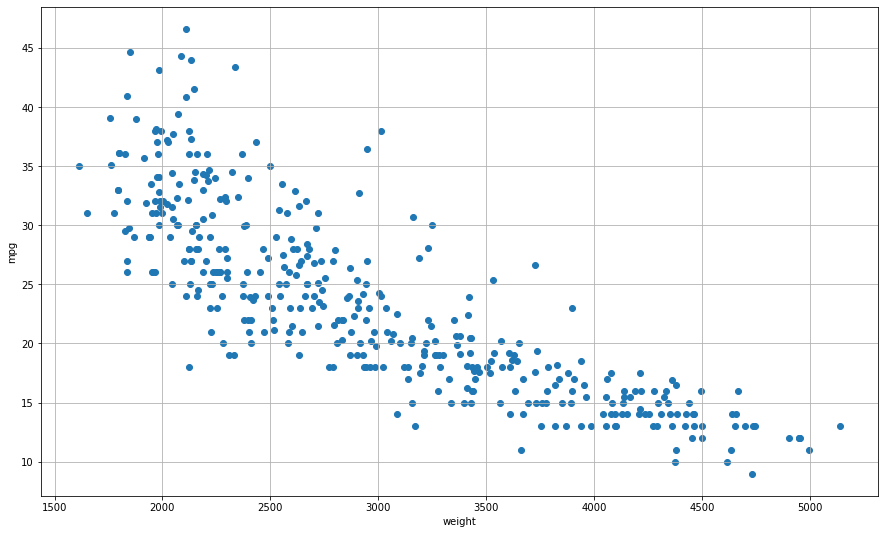

In [18]:
plt.figure(figsize = (15,9))
plt.scatter('weight', 'mpg', data=car_data)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.grid()
plt.show()

Ở biểu đồ trên, thấy rằng **Weight** càng lớn thì **mpg** càng nhỏ và ngược lại. Ta có thể kẻ một trend line để thể hiện mối quan hệ tuyến tính.

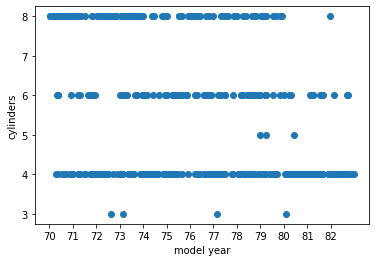

In [19]:
plt.scatter(car_data['model year'] + np.random.random(len(car_data['model year'])) , car_data['cylinders'])
plt.xlabel('model year')
plt.ylabel('cylinders')
plt.xticks(np.arange(min(car_data['model year']), max(car_data['model year'])+1, 1.0)) 
plt.show()

Thêm noise vào **model Year** 

*Nhận xét*: 
* Xe 3 kì chỉ có 4 chiếc với gian đoạn khá rời rạc, xe 5 kì còn ít hơn (3 chiếc), giai đoạn 80-82 thì chỉ có 1 chiếc 8 kì được sản xuất
* Được ưa chuộng nhất là xe 4 kì trải dài qua thời gian, ngoài ra là 6-8 kì

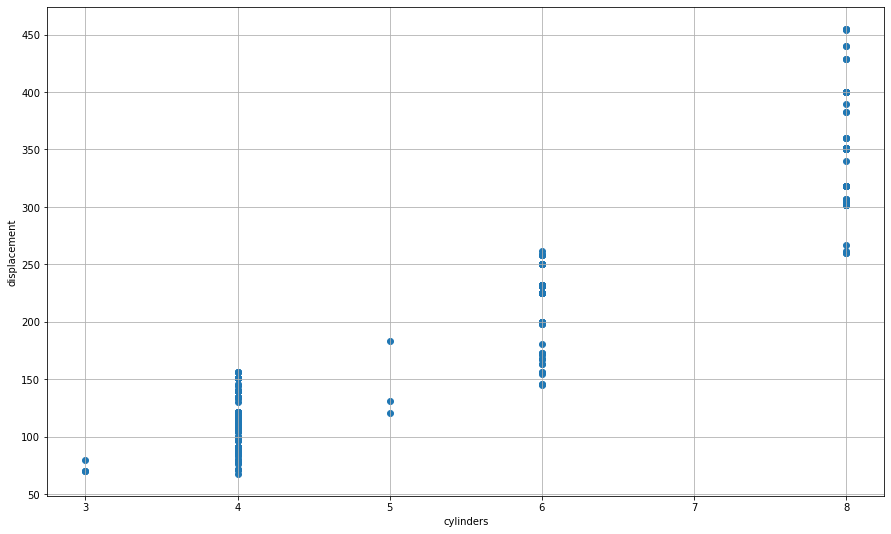

In [28]:
plt.figure(figsize = (15,9))
plt.scatter('cylinders', 'displacement', data=car_data)
plt.xlabel('cylinders')
plt.ylabel('displacement')
plt.grid()
plt.show()

*Nhận xét*:
* cylinder càng cao thì displacement càng cao

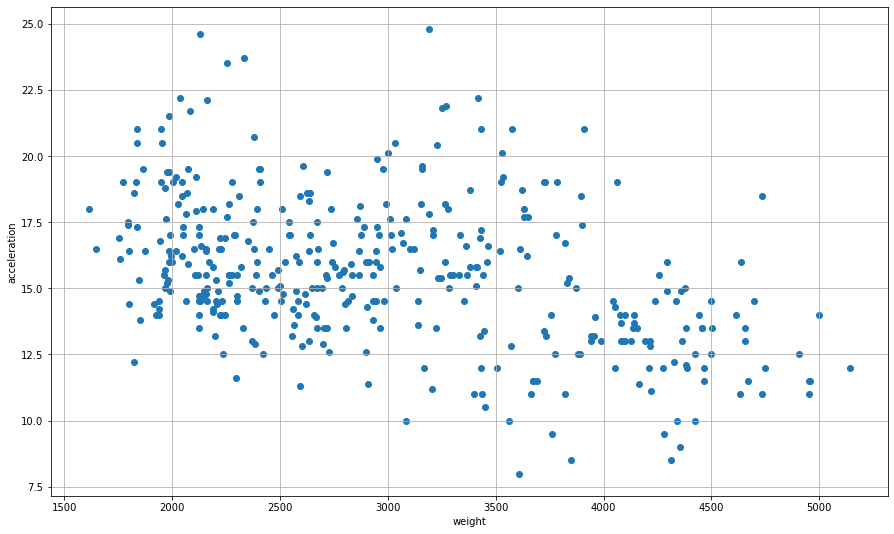

In [21]:
plt.figure(figsize = (15,9))
plt.scatter('weight', 'acceleration', data=car_data)
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.grid()
plt.show()

*Nhận xét*:
* Khả năng tăng tốc sẽ tỉ lệ nghịch với cân nặng, đó là hiển nhiên
* Tuy nhiên dữ liệu này có nhiều noise, khó mà nói trước được

In [22]:
companies = car_data[['model year','origin','car name']]
b = companies.groupby(['origin','model year']).agg('count')

In [23]:
idx = b.index.levels
c = len(idx[1])
companies_years = pd.DataFrame(b.values.reshape(-1,c),index=idx[0].values, columns=idx[1].values)

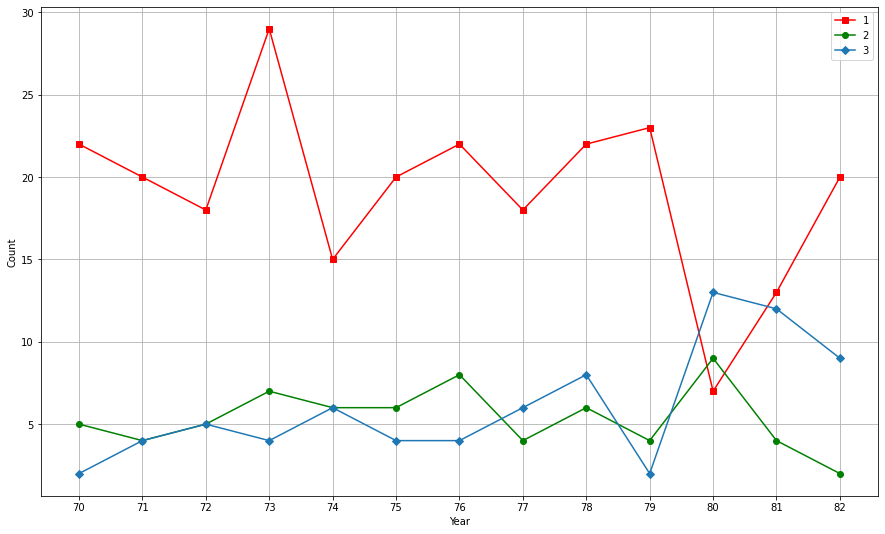

In [24]:
plt.figure(figsize = (15,9))
sign = ['r-s','g-o', 'D-']
plt.grid()
plt.xticks(np.arange(min(companies_years.columns.values), max(companies_years.columns.values)+1, 1))
for i in range(3):
    plt.plot(companies_years.columns.values,companies_years.iloc[i],sign[i], label = i+1)
plt.legend(loc='best')
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

*Nhận xét*:

* Có duy nhất năm 79, số lượng xe công ti 1 nhỏ nhất, còn lại đều là lớn nhất
* Cong ti 1 có số xe dường như hơn cả tổng số lượng của 2 công ti còn lại mỗi năm.

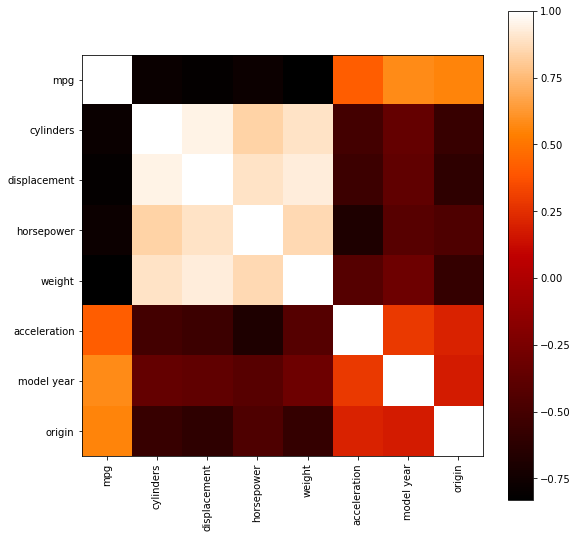

In [25]:
plt.figure(figsize = (9,9))
plt.imshow(car_data.corr(), cmap='gist_heat')
car_corr = car_data.drop('car name',axis = 1)
plt.colorbar()
plt.xticks(range(len(car_corr.columns)),car_corr.columns,rotation='vertical')
plt.yticks(range(len(car_corr.columns)),car_corr.columns)
plt.show()

*Nhận xét*:

* **mpg** có mối quan hệ tuyến tính âm với nhiều thuộc tính khác.
* Các mảng màu chia ra rõ rệt.

In [26]:
car_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000
